# How does a Deep Learning Network Learn

## Universal Approximation

$$ Z = 2X^2 - 3Y^2 + 5 + \alpha

### Create a noisy data

In [3]:
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [208]:
n = 1000
start = -10
end = 10
step = (end - start)/n

In [209]:
x = np.arange(start, end, step)
y = np.arange(start, end, step)

### Plot this function

In [210]:
X, Y = np.meshgrid(x, y)

In [211]:
X.shape, Y.shape

((1000, 1000), (1000, 1000))

In [212]:
a = np.arange(1,5,1)
b = np.arange(6,10,1)

In [213]:
a,b

(array([1, 2, 3, 4]), array([6, 7, 8, 9]))

In [214]:
A, B = np.meshgrid(a,b)

In [215]:
A,B

(array([[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]]), array([[6, 6, 6, 6],
        [7, 7, 7, 7],
        [8, 8, 8, 8],
        [9, 9, 9, 9]]))

In [216]:
C = np.ones((n,n))

In [217]:
e = np.random.rand(n,n)

In [218]:
Z = 2*X*X - 3*Y*Y + 5*C + e

### Plot the function

In [219]:
from mpl_toolkits.mplot3d import Axes3D

In [220]:
def plot3D(X, Y, Z):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, color="b")
    plt.show

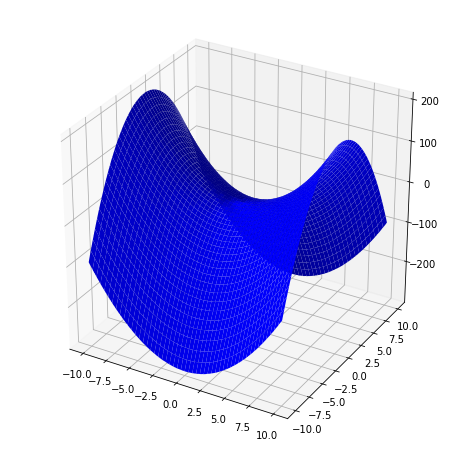

In [221]:
plot3D(X, Y, Z)

### Create input and output shape

In [222]:
X.reshape(-1)

array([-10.  ,  -9.98,  -9.96, ...,   9.94,   9.96,   9.98])

In [223]:
Y.reshape(-1)

array([-10.  , -10.  , -10.  , ...,   9.98,   9.98,   9.98])

In [224]:
input_xy = np.c_[X.reshape(-1), Y.reshape(-1)]

In [225]:
output_z = Z.reshape(-1)

In [226]:
output_z.shape

(1000000,)

In [227]:
input_xy.shape

(1000000, 2)

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
train_test_split?

Signature: train_test_split(*arrays, **options)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float, int, None, optional
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. By default, the value is set to 0.25.
    The default will change in version 0.21. It will remain 0.25 only
    if ``train_size`` is unspecified, otherwise it will 

In [230]:
input_xy_train, input_xy_test, output_z_train, output_z_test = train_test_split(input_xy, output_z,
                                                                                test_size=0.2, random_state=1234)

In [231]:
input_xy_train.shape

(800000, 2)

In [232]:
from keras.models import Sequential
from keras.layers import Dense

In [240]:
model_xyz = Sequential()
model_xyz.add(Dense(100, input_dim=2, activation="relu"))
model_xyz.add(Dense(40, activation="relu"))
model_xyz.add(Dense(1))

In [241]:
model_xyz.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 100)               300       
_________________________________________________________________
dense_30 (Dense)             (None, 40)                4040      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 41        
Total params: 4,381
Trainable params: 4,381
Non-trainable params: 0
_________________________________________________________________


In [242]:
from helpers import MetricHistory

In [243]:
hist = MetricHistory()

In [244]:
tbcallback = keras.callbacks.TensorBoard(log_dir='logs/simple2-ml')

In [245]:
model_xyz.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [246]:
%time
history = model_xyz.fit(input_xy_train, output_z_train, batch_size=128, epochs=100, verbose=1, validation_split=0.2,
                      callbacks=[tbcallback])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 15 µs
Train on 640000 samples, validate on 160000 samples
Epoch 1/100
640000/640000 [==============================] - 9s 13us/step - loss: 439.9504 - mean_squared_error: 439.9504 - val_loss: 1.4062 - val_mean_squared_error: 1.4062
Epoch 2/100
640000/640000 [==============================] - 8s 13us/step - loss: 0.6273 - mean_squared_error: 0.6273 - val_loss: 0.3545 - val_mean_squared_error: 0.3545
Epoch 3/100
640000/640000 [==============================] - 8s 13us/step - loss: 0.3640 - mean_squared_error: 0.3640 - val_loss: 0.2808 - val_mean_squared_error: 0.2808
Epoch 4/100
640000/640000 [==============================] - 8s 13us/step - loss: 0.2972 - mean_squared_error: 0.2972 - val_loss: 0.3289 - val_mean_squared_error: 0.3289
Epoch 5/100
640000/640000 [==============================] - 8s 13us/step - loss: 0.2734 - mean_squared_error: 0.2734 - val_loss: 0.2405 - val_mean_squared_error: 0.2405
Epoch 6/100
640000/640000 [=====

In [182]:
# Plot validation and validation error
history.history.values()

dict_values([[11057.3855859375, 8820.69884765625, 5530.317578125, 2529.924794921875, 962.1158837890625, 647.3481494140625, 586.586630859375, 545.4342236328125, 512.5337280273437, 488.67814453125, 472.4446044921875, 455.8820458984375, 439.1949609375, 426.17486572265625, 414.0371362304688, 402.22305786132813, 393.38092041015625, 382.04944091796875, 370.63151123046873, 360.78206298828127], [11057.3855859375, 8820.69884765625, 5530.317578125, 2529.924794921875, 962.1158837890625, 647.3481494140625, 586.586630859375, 545.4342236328125, 512.5337280273437, 488.67814453125, 472.4446044921875, 455.8820458984375, 439.1949609375, 426.17486572265625, 414.0371362304688, 402.22305786132813, 393.38092041015625, 382.04944091796875, 370.63151123046873, 360.78206298828127], [11979.8334765625, 10400.542841796874, 7447.039912109375, 4069.0963232421873, 1640.6620349121094, 749.8921704101563, 601.9855895996094, 552.0570208740235, 516.6852709960938, 489.4864892578125, 469.64121887207034, 450.50688232421874, 

In [247]:
Z_pred = model_xyz.predict(input_xy).reshape(n,n)

In [152]:
Z_pred

array([[-69.59221 , -74.501976, -79.41176 , ..., -97.390755, -93.049614,
        -88.70852 ],
       [-62.867867, -67.77764 , -72.687416, ..., -90.75109 , -86.40995 ,
        -82.06887 ],
       [-56.143524, -61.053295, -65.96307 , ..., -84.11141 , -79.77029 ,
        -75.42918 ],
       ...,
       [-50.747578, -55.583065, -60.418518, ..., -79.55081 , -75.1354  ,
        -70.71997 ],
       [-57.393394, -62.228867, -67.06431 , ..., -86.28125 , -81.86582 ,
        -77.45044 ],
       [-64.03916 , -68.87461 , -73.71008 , ..., -93.011696, -88.59626 ,
        -84.18085 ]], dtype=float32)

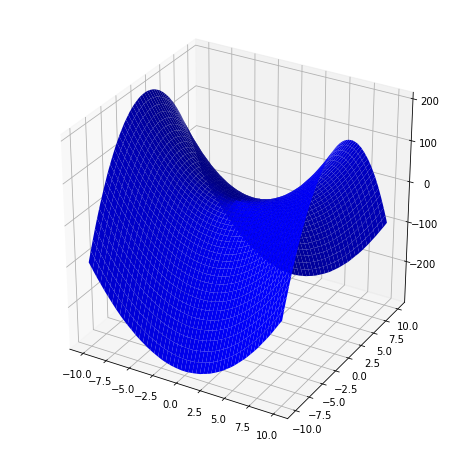

In [248]:
plot3D(X, Y, Z_pred)

In [185]:
def plot_metrics(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) +1)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.legend()
    plt.show()
    

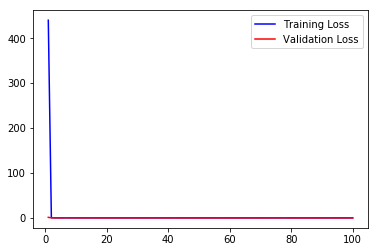

In [249]:
plot_metrics(history)